# Machine Learning Study Notes - Unsupervised Learning

## Clustering - K Means

### 1. Changing K

In this notebook, you will get some practice using different values of k in the k-means algorithm, and see how this changes the clusters that are observed in the data.  You'll also get excperience determining what the best value for k might be for a dataset.

To get started, let's read in our necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import helpers2 as h
import tests as t
from IPython import display

%matplotlib inline

# Make the images larger
#plt.rcParams['figure.figsize'] = (16, 9)

`1.` To get started, there is a function called **simulate_data** within the **helpers2** module.  Read the documentation on the function by running the cell below.  Then use the function to simulate a dataset with 200 data points (rows), 5 features (columns), and 4 centers

In [2]:
h.simulate_data

<function helpers2.simulate_data(n=500, features=10, centroids=3)>

In [3]:
data = h.simulate_data(200, 5, 4)# Create a dataset with 200 points, 5 features and 4 centers

# This will check that your dataset appears to match ours before moving forward
t.test_question_1(data)

Looks good!  Continue!


`2.` Because of how you set up the data, what should the value of **k** be?

In [4]:
k_value = 4# What should the value of k be?

# Check your solution against ours.
t.test_question_2(k_value)

That's right!  The value of k is the same as the number of centroids used to create your dataset.


`3.` Let's try a few different values for **k** and fit them to our data using **KMeans**.

To use KMeans, you need to follow three steps:

**I.** Instantiate your model.

**II.** Fit your model to the data.

**III.** Predict the labels for the data.

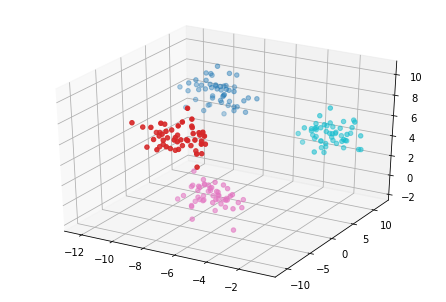

In [5]:
# Try instantiating a model with 4 centers
kmeans_4 = KMeans(n_clusters=4)#instantiate your model

# Then fit the model to your data using the fit method
model_4 = kmeans_4.fit(data)#fit the model to your data using kmeans_4

# Finally predict the labels on the same data to show the category that point belongs to
labels_4 = model_4.predict(data)#predict labels using model_4 on your dataset

# If you did all of that correctly, this should provide a plot of your data colored by center
h.plot_data(data, labels_4)

`4.` Now try again, but this time fit kmeans using 2 clusters instead of 4 to your data.

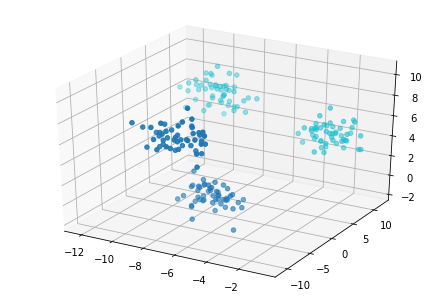

In [6]:
# Try instantiating a model with 2 centers
kmeans_2 = KMeans(n_clusters=2)

# Then fit the model to your data using the fit method
model_2 = kmeans_2.fit(data)

# Finally predict the labels on the same data to show the category that point belongs to
labels_2 = model_2.predict(data)

# If you did all of that correctly, this should provide a plot of your data colored by center
h.plot_data(data, labels_2)

`5.` Now try one more time, but with the number of clusters in kmeans to 7.

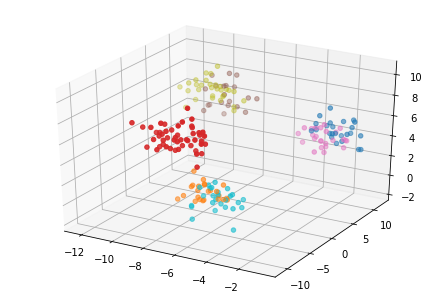

In [7]:
# Try instantiating a model with 7 centers
kmeans_7 = KMeans(n_clusters=7)

# Then fit the model to your data using the fit method
model_7 = kmeans_7.fit(data)

# Finally predict the labels on the same data to show the category that point belongs to
labels_7 = model_7.predict(data)

# If you did all of that correctly, this should provide a plot of your data colored by center
h.plot_data(data, labels_7)

Visually, we get some indication of how well our model is doing, but it isn't totally apparent. Each time additional centers are considered, the distances between the points and the center will decrease.  However, at some point, that decrease is not substantial enough to suggest the need for an additional cluster.  

Using a scree plot is a common method for understanding if an additional cluster center is needed.  The elbow method used by looking at a scree plot is still pretty subjective, but let's take a look to see how many cluster centers might be indicated.
_________

`6.` Once you have **fit** a kmeans model to some data in sklearn, there is a **score** method, which takes the data.  This score is an indication of how far the points are from the centroids.  By fitting models for centroids from 1-10, and keeping track of the score and the number of centroids, you should be able to build a scree plot.  

This plot should have the number of centroids on the x-axis, and the absolute value of the score result on the y-axis.  You can see the plot I retrieved by running the solution code.  Try creating your own scree plot, as you will need it for the final questions.

In [8]:
#Get scores from Kmeans 1-10

scores= []
number = list(range(1,11))
for i in number:
    kmeans = KMeans(n_clusters=i)
    model = kmeans.fit(data)
    scores.append(np.abs(model.score(data)))

Text(0.5, 1.0, 'Elbow Method for Optimal k')

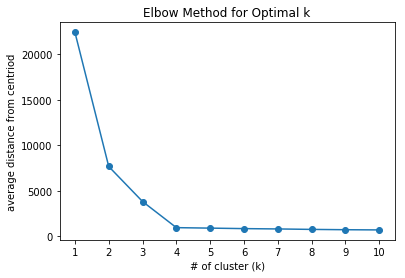

In [9]:
#Graph scores vs cluster
plt.plot(number, scores, marker='o')
plt.xticks(number)
plt.xlabel('# of cluster (k)')
plt.ylabel('average distance from centriod')
plt.title('Elbow Method for Optimal k')

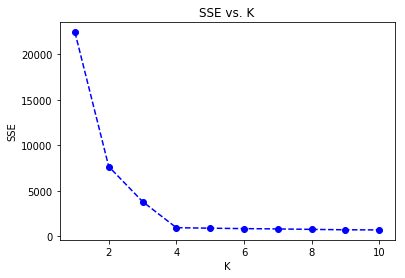

In [10]:
# Soluion from Udacity

def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding SSE for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the SSE score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)

    # Then fit the model to your data using the fit method
    model = kmeans.fit(data)
    
    # Obtain a score related to the model fit
    score = np.abs(model.score(data))
    
    return score

scores2 = []
centers = list(range(1,11))

for center in centers:
    scores2.append(get_kmeans_score(data, center))

#Your plot should look similar to the below
plt.plot(centers, scores2, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K');

`7.` Using the scree plot, how many clusters would you suggest as being in the data?  What is K?

4

### 2. Feature Scaling
With any distance based machine learning model (regularized regression methods, neural networks, and now kmeans), you will want to scale your data.

If you have some features that are on completely different scales, this can greatly impact the clusters you get when using K-Means.

In this notebook, you will get to see this first hand. To begin, let's read in the necessary libraries.

In [11]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing as p

%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
import helpers2 as h
import tests as t


# Create the dataset for the notebook
data = h.simulate_data(200, 2, 4)
df = pd.DataFrame(data)
df.columns = ['height', 'weight']
df['height'] = np.abs(df['height']*100)
df['weight'] = df['weight'] + np.random.normal(50, 10, 200)

In [12]:
df.head()

,height,weight
0,650.565335,66.784699
1,512.894273,52.761414
2,885.057453,45.925965
3,1028.641210,46.524383
4,746.899195,62.751803


In [13]:
df.describe()

,height,weight
count,200.000000,200.000000
mean,569.726207,52.248797
std,246.966215,11.464648
min,92.998481,21.609857
25%,357.542793,44.869450
50%,545.766752,51.174933
75%,773.310607,60.031983
max,1096.222348,82.885820


Now that we've got a dataset, let's look at some options for scaling the data.  As well as how the data might be scaled.  There are two very common types of feature scaling that we should discuss:


**I.  MinMaxScaler**

In some cases it is useful to think of your data in terms of the percent they are as compared to the maximum value.  In these cases, you will want to use **MinMaxScaler**.

**II. StandardScaler**

Another very popular type of scaling is to scale data so that it has mean 0 and variance 1.  In these cases, you will want to use **StandardScaler**.  

It is probably more appropriate with this data to use **StandardScaler**.  However, to get practice with feature scaling methods in python, we will perform both.

`2.` First let's fit the **StandardScaler** transformation to this dataset.  I will do this one so you can see how to apply preprocessing in sklearn.

In [14]:
df_ss = p.StandardScaler().fit_transform(df) 

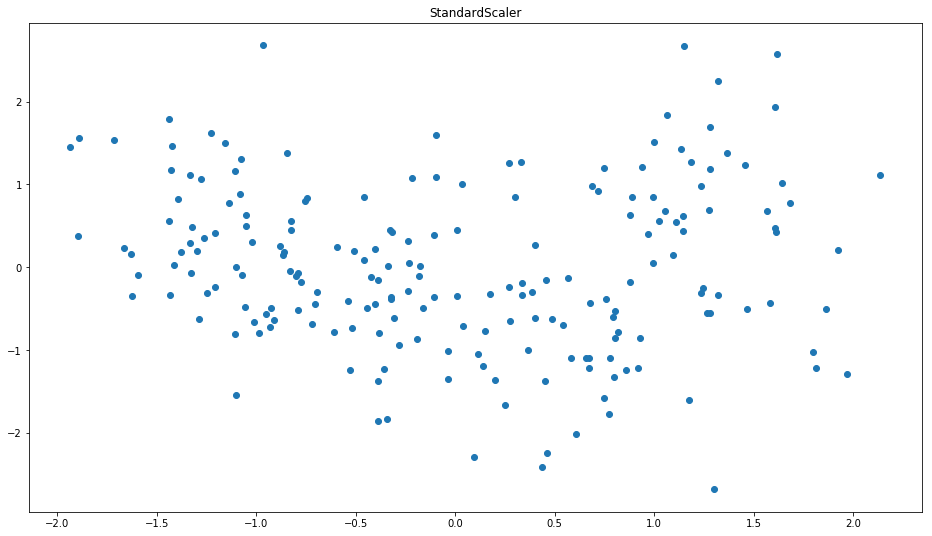

In [15]:
df_ss = pd.DataFrame(df_ss) #create a dataframe
df_ss.columns = ['height', 'weight'] #add column names again

#Plot
plt.scatter(df_ss['height'], df_ss['weight'])
plt.title('StandardScaler');

`3.` Now it's your turn.  Try fitting the **MinMaxScaler** transformation to this dataset. You should be able to use the previous example to assist.

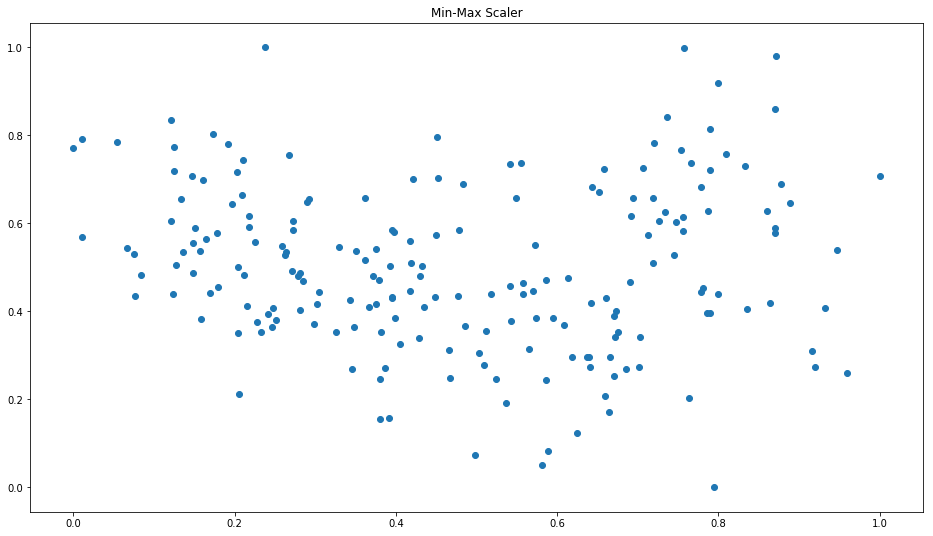

In [16]:
df_minmax = p.MinMaxScaler().fit_transform(data)
df_minmax = pd.DataFrame(df_minmax)
df_minmax.columns = ['height','weight']

plt.scatter(df_minmax.height, df_minmax.weight)
plt.title('Min-Max Scaler');

`4.`  Now let's take a look at how kmeans divides the dataset into different groups for each of the different scalings of the data.  Did you end up with different clusters when the data was scaled differently?

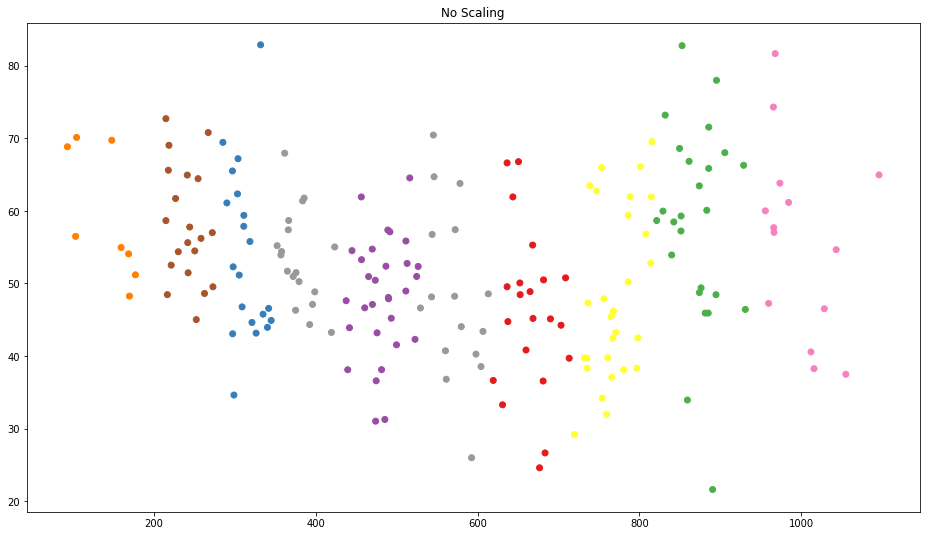

In [17]:
def fit_kmeans(data, centers):
    '''
    INPUT:
        data = the dataset you would like to fit kmeans to (dataframe)
        centers = the number of centroids (int)
    OUTPUT:
        labels - the labels for each datapoint to which group it belongs (nparray)
    
    '''
    kmeans = KMeans(centers)
    labels = kmeans.fit_predict(data)
    return labels

labels = fit_kmeans(df, 10) #fit kmeans to get the labels
    
# Plot the original data with clusters
plt.scatter(df['height'], df['weight'], c=labels, cmap='Set1')
plt.title('No Scaling');

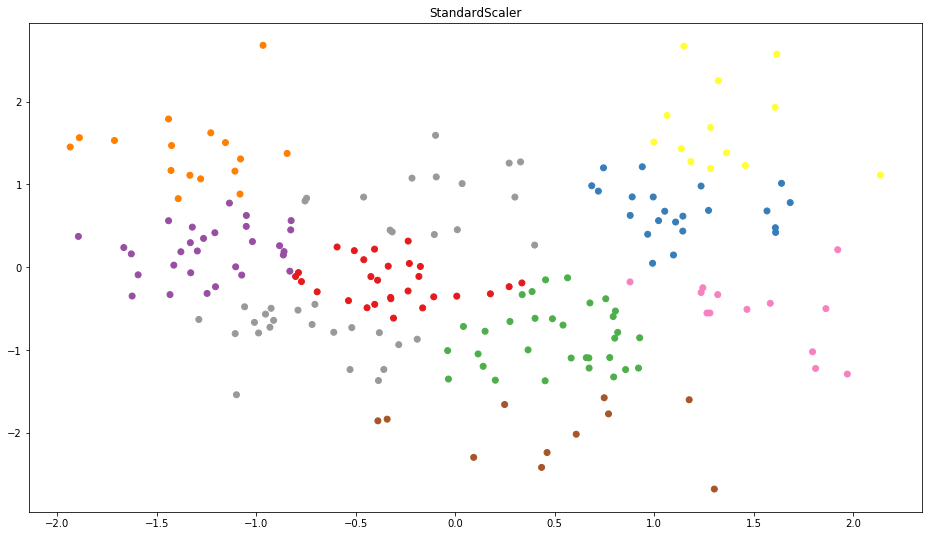

In [18]:
labels2 = fit_kmeans(df_ss,10)
plt.scatter(df_ss['height'], df_ss['weight'], c=labels2, cmap='Set1')
plt.title('StandardScaler');

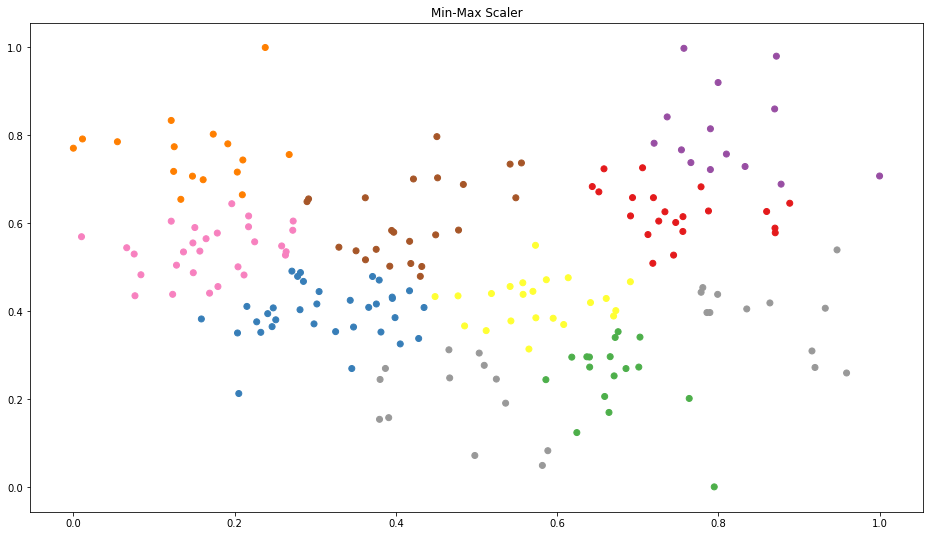

In [19]:
labels3= fit_kmeans(df_minmax,10)
plt.scatter(df_minmax['height'], df_minmax['weight'], c=labels3, cmap='Set1')
plt.title('Min-Max Scaler');

As seen from the graph above,  we did end up with different clusters when the data was scaled differently.

# Hierarchical and Density Based Clustering
In this notebook, we will be using sklearn to conduct hierarchical clustering on the [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris) which contains 4 dimensions/attributes and 150 samples. Each sample is labeled as one of the three type of Iris flowers.

In this exercise, we'll ignore the labeling and cluster based on the attributes, then we'll compare the results of different hierarchical clustering techniques with the original labels to see which one does a better job in this scenario. We'll then proceed to visualize the resulting cluster hierarchies.

### 1. Hierarchical Clustering (Complete-link, Average-link, Ward)

`1.` Importing the Iris dataset

In [20]:
from sklearn import datasets

iris = datasets.load_iris()

In [21]:
#Data - 4 attributes
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [22]:
#Actual classification
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

`2.` Clustering with AgglomerativeClustering

In [23]:
from sklearn.cluster import AgglomerativeClustering
#Clustering with the ward method
ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(iris.data)

#Clustering with complete-link
complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
c_pred = complete.fit_predict(iris.data)

#Clustering with average-link
average = AgglomerativeClustering(n_clusters=3, linkage='average')
a_pred = average.fit_predict(iris.data)

#Clustering with single-link
single = AgglomerativeClustering(n_clusters=3, linkage='single')
s_pred = single.fit_predict(iris.data)

***To determine which clustering result better matches the original labels of the samples, we can use adjusted_rand_score which is an external cluster validation index which results in a score between -1 and 1, where 1 means two clusterings are identical of how they grouped the samples in a dataset (regardless of what label is assigned to each cluster).***

Cluster validation indices are discussed later in the course.

In [24]:
from sklearn.metrics import adjusted_rand_score

ward_ar_score = adjusted_rand_score(iris.target, ward_pred)
c_ar_score = adjusted_rand_score(iris.target, c_pred)
a_ar_score = adjusted_rand_score(iris.target, a_pred)
s_ar_score = adjusted_rand_score(iris.target, s_pred)

In [25]:
print( "Scores: \nWard:", ward_ar_score,"\nComplete: ", c_ar_score, "\nAverage: ", a_ar_score, '\nSingle: ', s_ar_score)

Scores: 
Ward: 0.7311985567707745 
Complete:  0.64225125183629 
Average:  0.7591987071071522 
Single:  0.5637510205230709


`3.` The effect of normalization on clustering

In [26]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

Looking at this, we can see that the forth column has smaller values than the rest of the columns, and so its variance counts for less in the clustering process (since clustering is based on distance). Let us normalize the dataset so that each dimension lies between 0 and 1, so they have equal weight in the clustering process.

This is done by subtracting the mean of each column then dividing the difference by the range.

In [27]:
from sklearn.preprocessing import normalize

normalized_X = normalize(iris.data)
normalized_X[:10]

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451]])

In [28]:
#Redo the clustering
ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(normalized_X)

complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
c_pred = complete.fit_predict(normalized_X)

average = AgglomerativeClustering(n_clusters=3, linkage='average')
a_pred = average.fit_predict(normalized_X)

single = AgglomerativeClustering(n_clusters=3, linkage='single')
s_pred = single.fit_predict(normalized_X)

#AR score
ward_ar_score = adjusted_rand_score(iris.target, ward_pred)
c_ar_score = adjusted_rand_score(iris.target, c_pred)
a_ar_score = adjusted_rand_score(iris.target, a_pred)
s_ar_score = adjusted_rand_score(iris.target, s_pred)

#Display the scores
print( "Scores: \nWard:", ward_ar_score,"\nComplete: ", c_ar_score, "\nAverage: ", a_ar_score, '\nSingle: ', s_ar_score)

Scores: 
Ward: 0.8856970310281228 
Complete:  0.644447235392006 
Average:  0.5583714437541352 
Single:  0.5583714437541352


`4.` Dendrogram visualization with scipy

In [29]:
#Call and define the linkage library
from scipy.cluster.hierarchy import linkage

linkage_type = 'ward'

linkage_matrix = linkage(normalized_X, linkage_type)

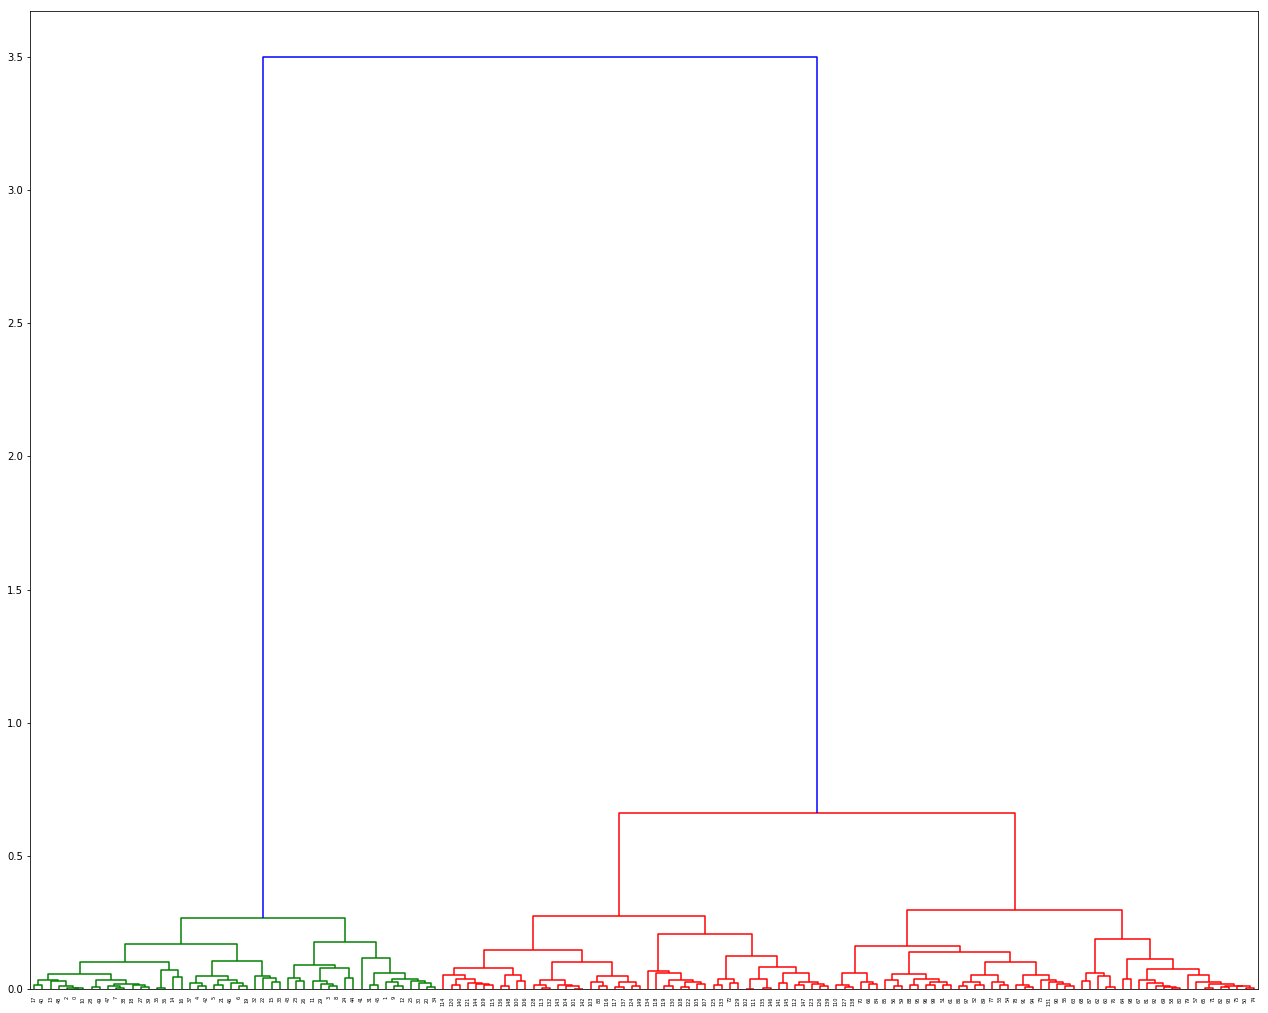

In [30]:
#Plot the dendrogram
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=[22,18])

dendrogram(linkage_matrix);

`5.` Clustered heat map (double dendrograms) visualization with seaborn

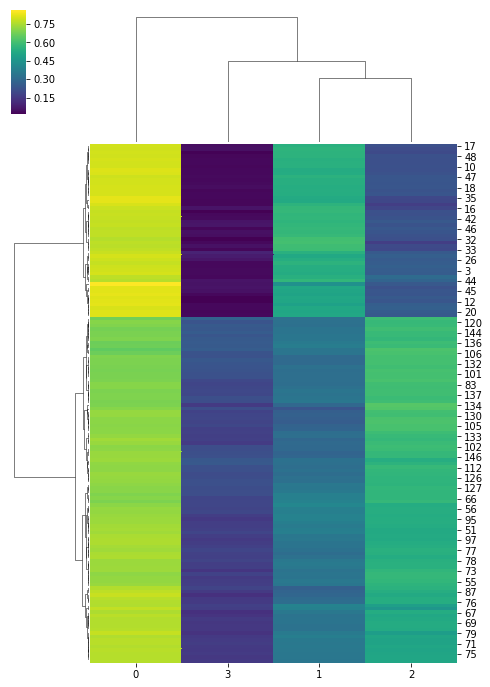

In [31]:
import seaborn as sb

sb.clustermap(normalized_X, figsize=[8,12], method=linkage_type, cmap='viridis');

### 2. DBSCAN

`1.` Dataset 1

In [32]:
from sklearn import datasets, cluster
df = pd.read_csv('blobs.csv').head(80).values

In [33]:
df[:5]

array([[ 8.62218539,  1.93579579],
       [-4.73670958, -7.97095765],
       [ 9.62122205,  0.92542315],
       [ 6.16209503, -0.27325437],
       [ 8.69748809, -1.05745206]])

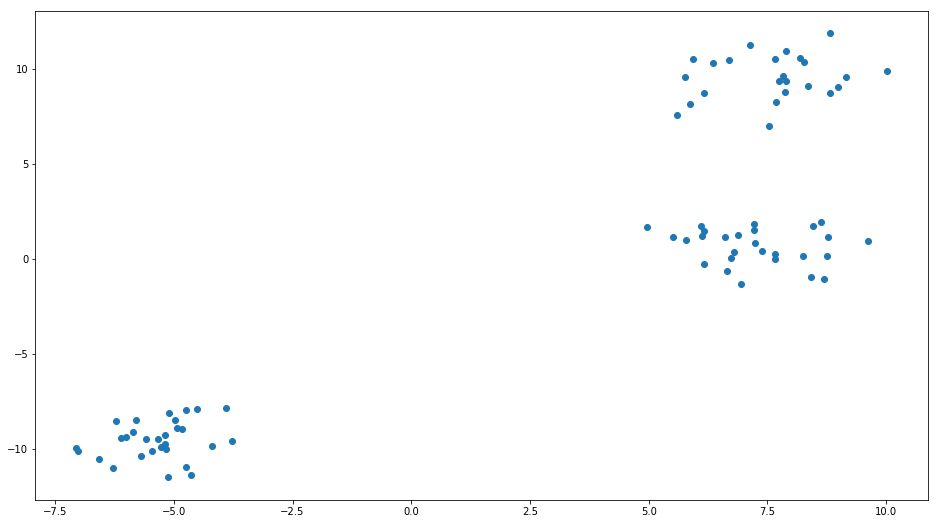

In [34]:
#Plot
plt.scatter(df[:,0], df[:,1]);

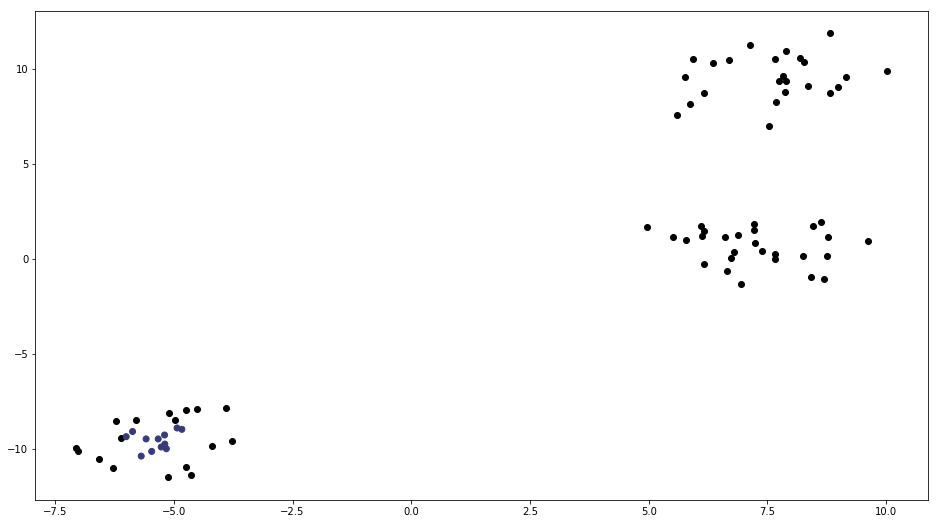

In [35]:
#Apply dbscan with default settings
dbscan = cluster.DBSCAN()
labels = dbscan.fit_predict(df)
not_noise = labels[labels!=-1]
plt.scatter(df[:,0][labels==-1], df[:,1][labels==-1], c='black') #black dot for the noise
plt.scatter(df[:,0][labels!=-1], df[:,1][labels!=-1], c=not_noise, cmap='tab20b');

In [36]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [37]:
#Create a function for DBSCAN so we can optimize with different parameters easily
def dbscan(dataset, eps=0.5, min_sample=5):
    dbscan = cluster.DBSCAN(eps= eps, min_samples= min_sample)
    label = dbscan.fit_predict(dataset)
    not_noise = label[label!= -1]
    plt.scatter(dataset[:,0][label==-1], dataset[:,1][label==-1], c='black', s=15, alpha=0.7) #Identfy noise and color them
    plt.scatter(dataset[:,0][label!=-1], dataset[:,1][label!=-1], c=not_noise, cmap='tab20b');

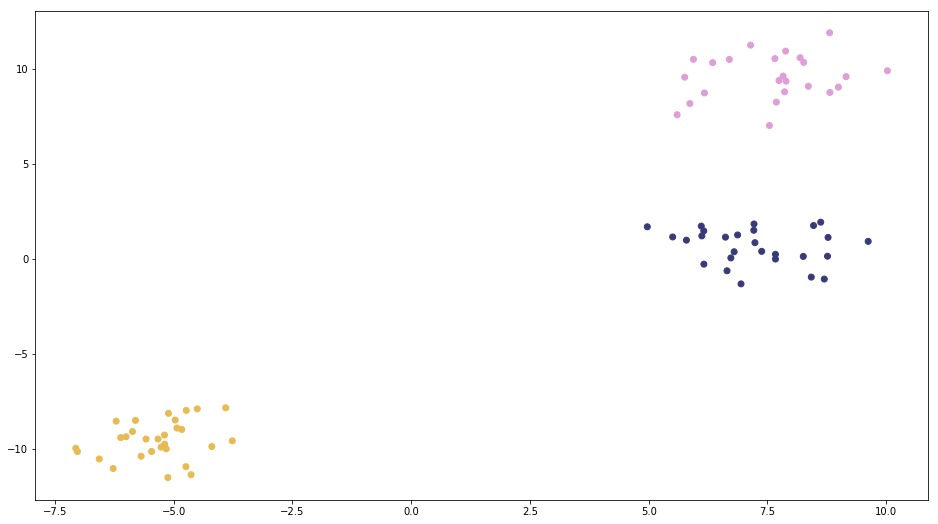

In [38]:
#Plot with epsilon = 2
dbscan(df,2)

DBSCAN now able to properly identify the three clusters

`2.` Dataset 2

In [39]:
df2 = pd.read_csv('varied.csv')[:300].values

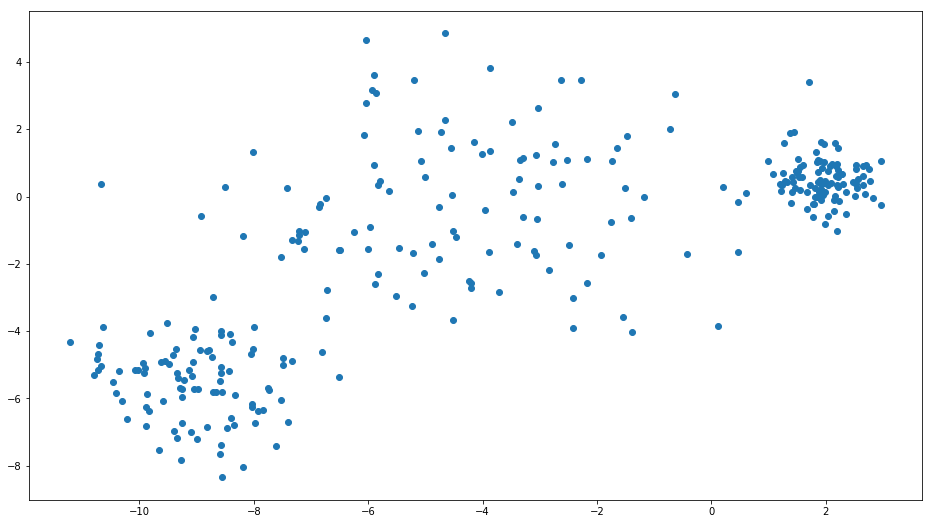

In [40]:
#Regular scatter plot
plt.scatter(df2[:,0], df2[:,1]);

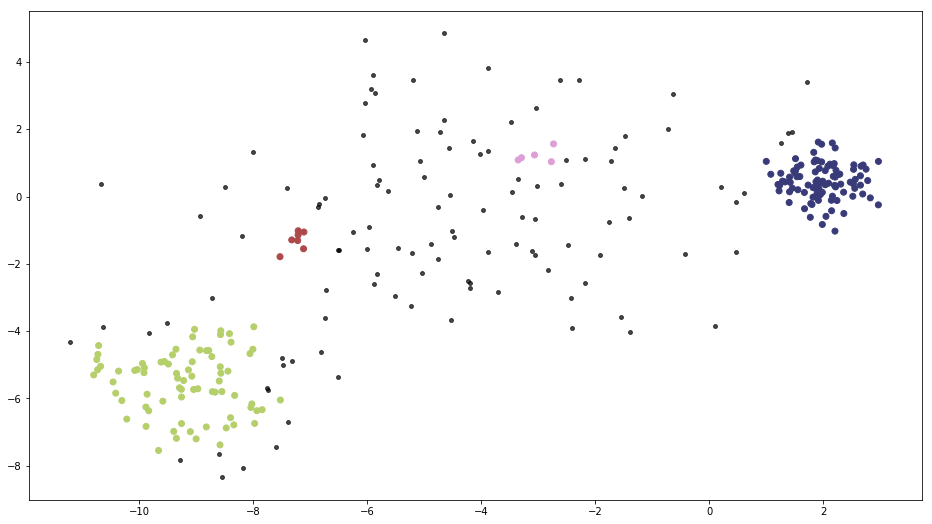

In [41]:
#Apply DBSCAN w default settings
dbscan(df2)

This clustering could make sense in some scenarios, but it seems rather arbitrary. Looking at the dataset, we can imagine at least two scenarios for what we'd want to do:
 * **Scenario** 1: Break the dataset up into three clusters: the blob on the left, the blob on the right, and the central area (even though it's less dense than the blobs on either side).
 * **Scenario 2**: Break the dataset up into two clusters: the blob on the left, and the blob on the right. Marking all the points in the center as noise. 
 
What values for the DBSCAN parameters would allow us to satisfy each of those senarios? Try a number of parameters to see if you can find a clustering that makes more sense.


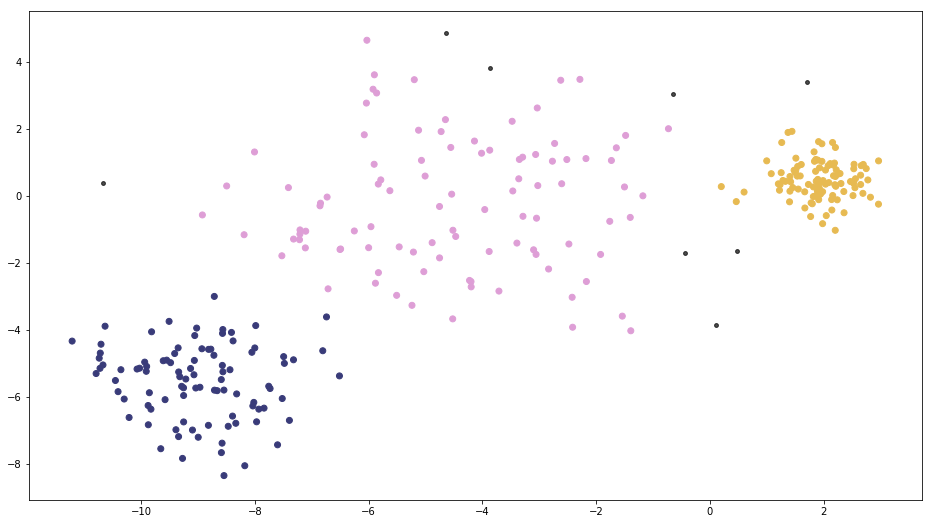

In [42]:
#Scenario 1
dbscan(df2,1.3)

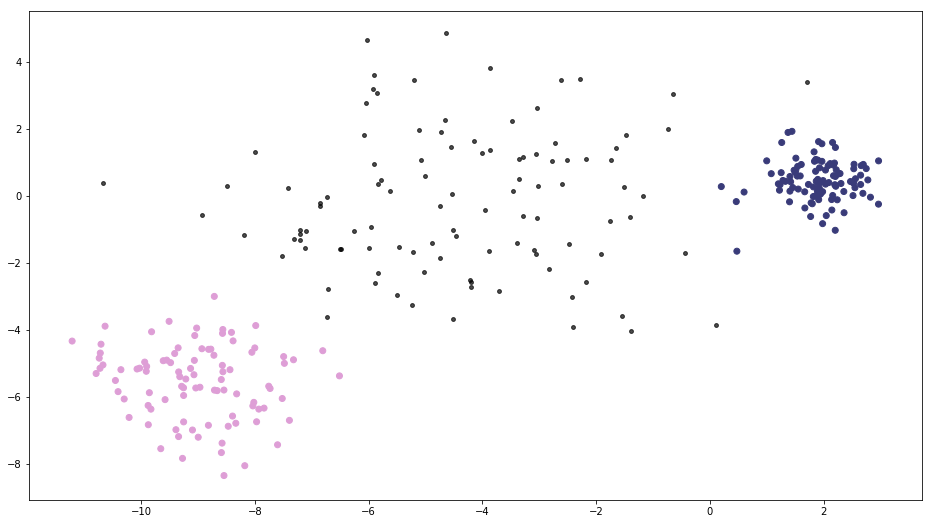

In [43]:
#Scenario 2
dbscan(df2,1.5,30)

Use grid plot to determine the best settings for eps_values and min_samples_values

In [44]:
#Grid plot values
eps_values = [0.3, 0.5, 1, 1.3, 1.5]
min_samples_values = [2, 5, 10, 20, 80]

In [45]:
#Create function for grid plot
def dbscan_grid(dataset, eps, min_sample):
    #Figure size
    fig = plt.figure(figsize=[18,20])
    
    #define plot location
    plot_num = 1
    
    for i in min_sample:
        for j in eps:
            ax = fig.add_subplot(len(eps), len(min_sample), plot_num) #Create a subplot for each eps/min_samples combo
            
            
            dbscan = cluster.DBSCAN(eps= j, min_samples= i) 
            label = dbscan.fit_predict(dataset)
            not_noise = label[label!= -1]
            ax.scatter(dataset[:,0][label==-1], dataset[:,1][label==-1], c='black', s=15, alpha=0.8)
            ax.scatter(dataset[:,0][label!=-1], dataset[:,1][label!=-1], c=not_noise, cmap='tab20b')
            
            #Set title and hide axis
            ax.set_title('Epsilon: {} | Min Samples: {}'.format(i, j))
            ax.axes.get_xaxis().set_visible(False)
            ax.axes.get_yaxis().set_visible(False)
            
            #Next graph
            plot_num+=1;

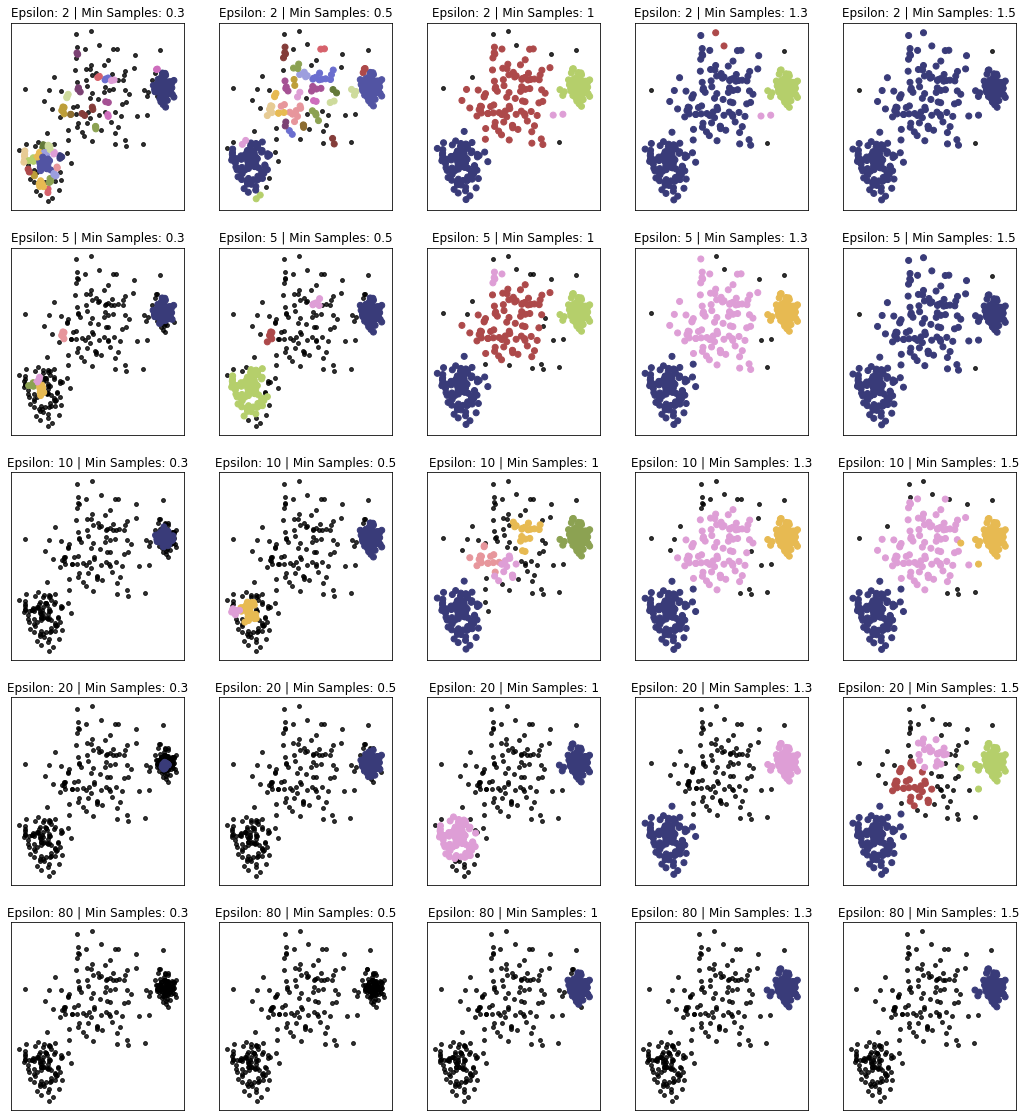

In [46]:
dbscan_grid(df2, eps_values,min_samples_values)

### 3. Gaussian Mixture Models vs KMeans

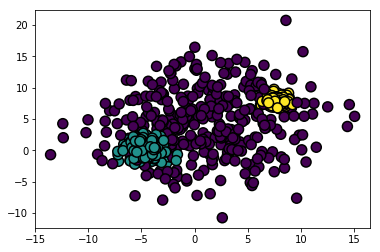

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture

%matplotlib inline

n_samples = 1000

varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[5, 1, 0.5],
                             random_state=3)
X, y = varied[0], varied[1]

plt.scatter(X[:,0], X[:,1], c=y, edgecolor='black', lw=1.5, s=100, cmap=plt.get_cmap('viridis'))
plt.show()